# OpenRemote: Solar Data Visualisation

## Imports & version checks

In [54]:
#Import statements
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as pyplot

In [55]:
#Check versions of libraries for debugging purposes
print("Python:\t", sys.version.split(' ')[0])
print("Version info:", sys.version_info)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__, "\n")

Python:	 3.8.5
Version info: sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
Pandas version: 1.1.3
Matplotlib version: 3.3.2 



## Reading the data

In [56]:
solar_data = pd.read_csv("./SolarData.csv")

In [57]:
print(solar_data.info(), "\n" ,solar_data.describe(), "\n")

#Get first or last 5 lines from a csv
solar_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       5474 non-null   object 
 1   name            5474 non-null   object 
 2   attribute_name  5474 non-null   object 
 3   value           5474 non-null   float64
dtypes: float64(1), object(3)
memory usage: 171.2+ KB
None 
               value
count   5474.000000
mean    3529.655081
std     4405.806515
min        0.000000
25%        0.000000
50%       11.828000
75%     4824.483033
max    12327.543179 



,timestamp,name,attribute_name,value
0,2021-02-11 04:10:22.926,Tamar building,totalPower,0.0
1,2021-02-11 04:10:23.089,Humber building,totalPower,0.0
2,2021-02-25 04:13:48.669,Humber building,totalPower,0.0
3,2021-02-25 04:13:54.488,Tamar building,totalPower,0.0
4,2021-02-11 04:40:23.122,Tamar building,totalPower,0.0


In [58]:
solar_data.tail()

,timestamp,name,attribute_name,value
5469,2021-02-25 02:43:54.267,Tamar building,totalPower,0.0
5470,2021-02-25 03:13:48.48,Humber building,totalPower,0.0
5471,2021-02-25 03:13:54.344,Tamar building,totalPower,0.0
5472,2021-02-25 03:43:48.586,Humber building,totalPower,0.0
5473,2021-02-25 03:43:54.412,Tamar building,totalPower,0.0


## Checking the count of each field value

In [59]:
#Get how many field values their are in the csv
for field in solar_data:
    print("******** Field:", field, "********")
    print(solar_data[field].value_counts())
    print()

******** Field: timestamp ********
2021-02-22 09:12:47.95     2
2021-03-07 18:46:25.114    2
2021-02-28 16:00:36.928    2
2021-02-28 12:14:30.15     2
2021-02-18 15:00:31.559    2
                          ..
2021-03-06 18:46:15.328    1
2021-02-15 05:41:05.845    1
2021-02-08 16:39:50.978    1
2021-02-18 09:41:57.831    1
2021-02-09 09:40:00.802    1
Name: timestamp, Length: 5079, dtype: int64

******** Field: name ********
Humber building    2743
Tamar building     2731
Name: name, dtype: int64

******** Field: attribute_name ********
totalPower     2939
totalEnergy    2535
Name: attribute_name, dtype: int64

******** Field: value ********
0.000000        1816
9641.242886       11
9551.316132       10
11844.620454      10
10182.854810       9
                ... 
4085.266169        1
11385.111339       1
4414.550044        1
11041.835611       1
1.687500           1
Name: value, Length: 3215, dtype: int64



## Adding extra fields

In [60]:
#Split date & time into seperate fields
solar_data['date'] = [datetime.split(' ')[0][2:].strip() for datetime in solar_data['timestamp']]
solar_data['time'] = [datetime.split(' ')[1].strip() for datetime in solar_data['timestamp']]
print(solar_data)

                    timestamp             name attribute_name  value  \
0     2021-02-11 04:10:22.926   Tamar building     totalPower    0.0   
1     2021-02-11 04:10:23.089  Humber building     totalPower    0.0   
2     2021-02-25 04:13:48.669  Humber building     totalPower    0.0   
3     2021-02-25 04:13:54.488   Tamar building     totalPower    0.0   
4     2021-02-11 04:40:23.122   Tamar building     totalPower    0.0   
...                       ...              ...            ...    ...   
5469  2021-02-25 02:43:54.267   Tamar building     totalPower    0.0   
5470   2021-02-25 03:13:48.48  Humber building     totalPower    0.0   
5471  2021-02-25 03:13:54.344   Tamar building     totalPower    0.0   
5472  2021-02-25 03:43:48.586  Humber building     totalPower    0.0   
5473  2021-02-25 03:43:54.412   Tamar building     totalPower    0.0   

          date          time  
0     21-02-11  04:10:22.926  
1     21-02-11  04:10:23.089  
2     21-02-25  04:13:48.669  
3     21-02

## Get details about a building or attribute

In [61]:
#Get the data of a single building
humber_building_data = solar_data.loc[solar_data['name'] == 'Humber building'].sort_values(by=['timestamp'])
tamar_bulding_data = solar_data.loc[solar_data['name'] == 'Tamar building'].sort_values(by=['timestamp'])

#Get the total power of a building and sort by attributes
humber_totalPower = humber_building_data.loc[humber_building_data['attribute_name'] == 'totalPower']
tamar_totalPower = tamar_bulding_data.loc[tamar_bulding_data['attribute_name'] == 'totalPower']

#Get the total energy of a bulding
humber_totalEnergy = humber_building_data.loc[humber_building_data['attribute_name'] == 'totalEnergy']
tamar_totalEnergy = tamar_bulding_data.loc[tamar_bulding_data['attribute_name'] == 'totalEnergy']

humber_totalPower_date = humber_totalPower.loc[humber_totalPower['date'] == '21-02-05'].sort_values(by=['time'])

## Graphs

### Total power or energy of a building over the whole dataset

<AxesSubplot:title={'center':'Total power of the tamar building'}, xlabel='timestamp'>

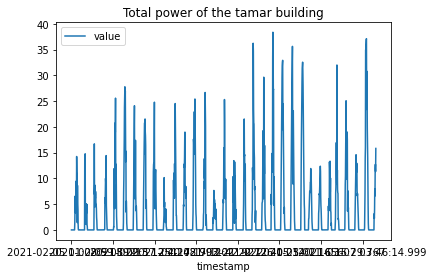

In [62]:
tamar_totalPower.plot(x='timestamp', y='value', title='Total power of the tamar building')

<AxesSubplot:title={'center':'Total energy of the humber building'}, xlabel='timestamp'>

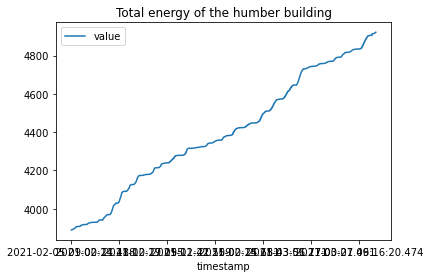

In [63]:
humber_totalEnergy.plot(x='timestamp', y='value', title='Total energy of the humber building')

### Total power or energy of a building on a single date

<AxesSubplot:title={'center':'Total power of the humber building on 05/02/21'}, xlabel='time'>

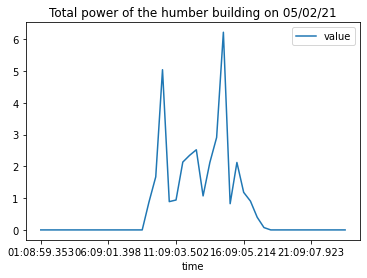

In [64]:
humber_totalPower_date.plot(x='time', y='value', title='Total power of the humber building on 05/02/21')